In [1]:
# Setup + load
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

IN_H5AD  = "../data/processed/SKCM_GSE134388_aPD1_umap.h5ad"
OUT_H5AD = "../data/processed/SKCM_GSE134388_aPD1_final_annotated.h5ad"

RESULTS_DIR = "../results/markers"
os.makedirs(RESULTS_DIR, exist_ok=True)

CLUSTER_KEY = "leiden"

TOPN_TABLE   = 50
TOPN_HEATMAP = 3
TOPN_DOTPLOT = 5

DPI = 300
UMAP_POINT_SIZE = 6

adata = sc.read_h5ad(IN_H5AD)

print("Loaded:", IN_H5AD)
print("Shape:", adata.shape)
print("Has UMAP?", "X_umap" in adata.obsm)
print("Has clusters?", CLUSTER_KEY in adata.obs.columns)
print("Has raw?", adata.raw is not None)

if "X_umap" not in adata.obsm:
    raise ValueError("UMAP missing: adata.obsm['X_umap'] not found.")

if CLUSTER_KEY not in adata.obs.columns:
    raise ValueError(f"{CLUSTER_KEY} missing in adata.obs.")

# Use raw for DE if it exists (this is what you should do in your case)
USE_RAW = adata.raw is not None
print("USE_RAW =", USE_RAW)

# helper: always save + show (prevents “empty saved plot” issues)
def save_show(path, dpi=DPI):
    fig = plt.gcf()
    fig.savefig(path, dpi=dpi, bbox_inches="tight")
    plt.show()
    plt.close(fig)

def fp(name):  # full path
    return os.path.join(RESULTS_DIR, name)


Loaded: ../data/processed/SKCM_GSE134388_aPD1_umap.h5ad
Shape: (3632, 2000)
Has UMAP? True
Has clusters? True
Has raw? True
USE_RAW = True


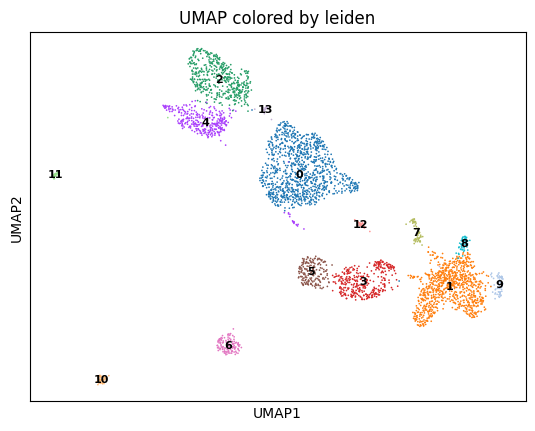

Saved: ../results/markers\umap_leiden_labels_axes.png


In [2]:
# Leiden UMAP with axes
sc.pl.umap(
    adata,
    color=CLUSTER_KEY,
    size=UMAP_POINT_SIZE,
    legend_loc="on data",
    legend_fontsize=8,
    frameon=True,   # IMPORTANT: keeps axes box
    title=f"UMAP colored by {CLUSTER_KEY}",
    show=False
)

ax = plt.gca()
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")

save_show(fp("umap_leiden_labels_axes.png"))
print("Saved:", fp("umap_leiden_labels_axes.png"))


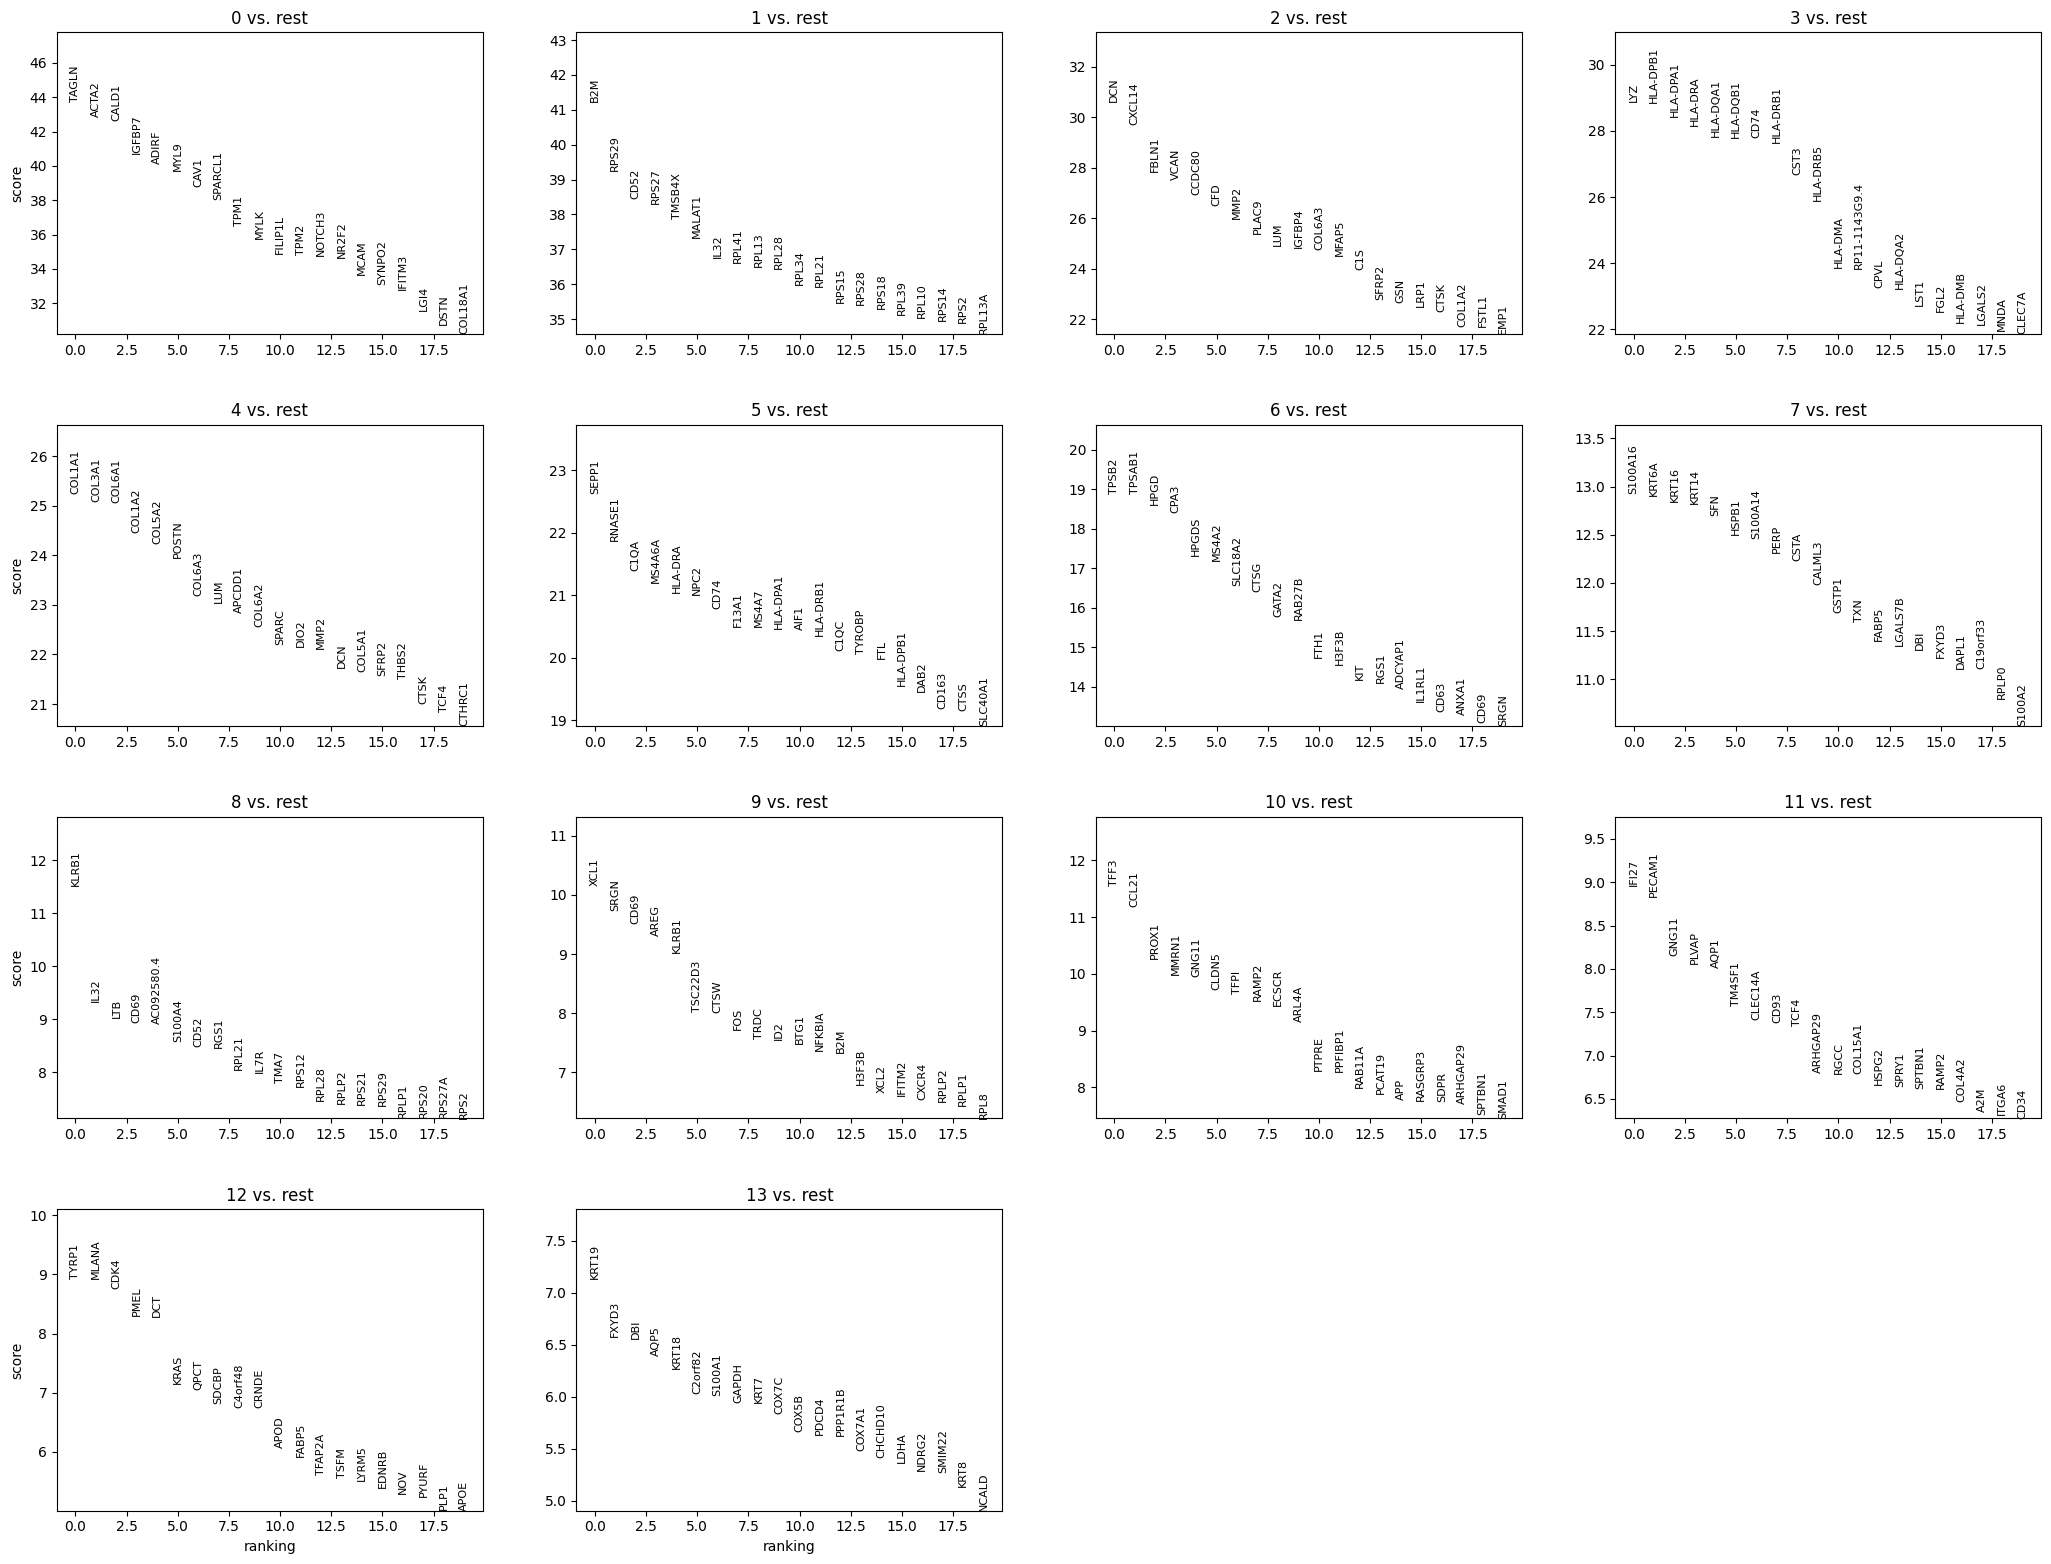

Saved: ../results/markers\rank_genes_groups_top20.png


,group,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference
0,0,TAGLN,43.722889,5.586539,0.000000e+00,0.000000e+00,0.955839,0.125144
1,0,ACTA2,42.861031,5.585583,0.000000e+00,0.000000e+00,0.940137,0.122847
2,0,CALD1,42.636620,3.455919,0.000000e+00,0.000000e+00,0.995093,0.384998
3,0,IGFBP7,40.685081,3.399173,0.000000e+00,0.000000e+00,0.990186,0.389973
4,0,ADIRF,40.127903,3.639889,0.000000e+00,0.000000e+00,0.983317,0.329889
5,0,MYL9,39.722282,4.644398,0.000000e+00,0.000000e+00,0.899902,0.158439
6,0,CAV1,38.798206,3.915208,0.000000e+00,0.000000e+00,0.922473,0.239571
7,0,SPARCL1,38.012074,4.646957,0.000000e+00,0.000000e+00,0.893032,0.143896
8,0,TPM1,36.494843,3.736783,1.338739e-291,2.187350e-288,0.876349,0.236892
9,0,MYLK,35.749496,5.552081,6.735589e-280,9.904684e-277,0.789990,0.065825


Saved: ../results/markers\markers_all_clusters_full.csv
Saved: ../results/markers\markers_top50_per_cluster.csv


In [3]:
# Rank genes + one CSV for all clusters
sc.tl.rank_genes_groups(
    adata,
    groupby=CLUSTER_KEY,
    method="wilcoxon",
    use_raw=USE_RAW,
    pts=True
)

# plot in notebook + save
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False, show=False)
save_show(fp("rank_genes_groups_top20.png"))
print("Saved:", fp("rank_genes_groups_top20.png"))

# single long table containing ALL clusters (this is the “one CSV” you want)
df_all = sc.get.rank_genes_groups_df(adata, group=None)

# top N per cluster (still one file)
df_top = (df_all.sort_values(["group", "scores"], ascending=[True, False])
                .groupby("group", sort=False)
                .head(TOPN_TABLE))

display(df_top.head(30))  # visible in notebook FIRST

df_all.to_csv(fp("markers_all_clusters_full.csv"), index=False)
df_top.to_csv(fp(f"markers_top{TOPN_TABLE}_per_cluster.csv"), index=False)

print("Saved:", fp("markers_all_clusters_full.csv"))
print("Saved:", fp(f"markers_top{TOPN_TABLE}_per_cluster.csv"))


In [4]:
# Wide marker table
wide = (df_top.assign(rank=df_top.groupby("group").cumcount()+1)
             .pivot(index="rank", columns="group", values="names"))
display(wide.head(10))
wide.to_csv(fp(f"markers_top{TOPN_TABLE}_per_cluster_WIDE.csv"))
print("Saved:", fp(f"markers_top{TOPN_TABLE}_per_cluster_WIDE.csv"))

group,0,1,10,11,12,13,2,3,4,5,6,7,8,9
rank,,,,,,,,,,,,,,
1,TAGLN,B2M,TFF3,IFI27,TYRP1,KRT19,DCN,LYZ,COL1A1,SEPP1,TPSB2,S100A16,KLRB1,XCL1
2,ACTA2,RPS29,CCL21,PECAM1,MLANA,FXYD3,CXCL14,HLA-DPB1,COL3A1,RNASE1,TPSAB1,KRT6A,IL32,SRGN
3,CALD1,CD52,PROX1,GNG11,CDK4,DBI,FBLN1,HLA-DPA1,COL6A1,C1QA,HPGD,KRT16,LTB,CD69
4,IGFBP7,RPS27,MMRN1,PLVAP,PMEL,AQP5,VCAN,HLA-DRA,COL1A2,MS4A6A,CPA3,KRT14,CD69,AREG
5,ADIRF,TMSB4X,GNG11,AQP1,DCT,KRT18,CCDC80,HLA-DQA1,COL5A2,HLA-DRA,HPGDS,SFN,AC092580.4,KLRB1
6,MYL9,MALAT1,CLDN5,TM4SF1,KRAS,C2orf82,CFD,HLA-DQB1,POSTN,NPC2,MS4A2,HSPB1,S100A4,TSC22D3
7,CAV1,IL32,TFPI,CLEC14A,QPCT,S100A1,MMP2,CD74,COL6A3,CD74,SLC18A2,S100A14,CD52,CTSW
8,SPARCL1,RPL41,RAMP2,CD93,SDCBP,GAPDH,PLAC9,HLA-DRB1,LUM,F13A1,CTSG,PERP,RGS1,FOS
9,TPM1,RPL13,ECSCR,TCF4,C4orf48,KRT7,LUM,CST3,APCDD1,MS4A7,GATA2,CSTA,RPL21,TRDC


Saved: ../results/markers\markers_top50_per_cluster_WIDE.csv


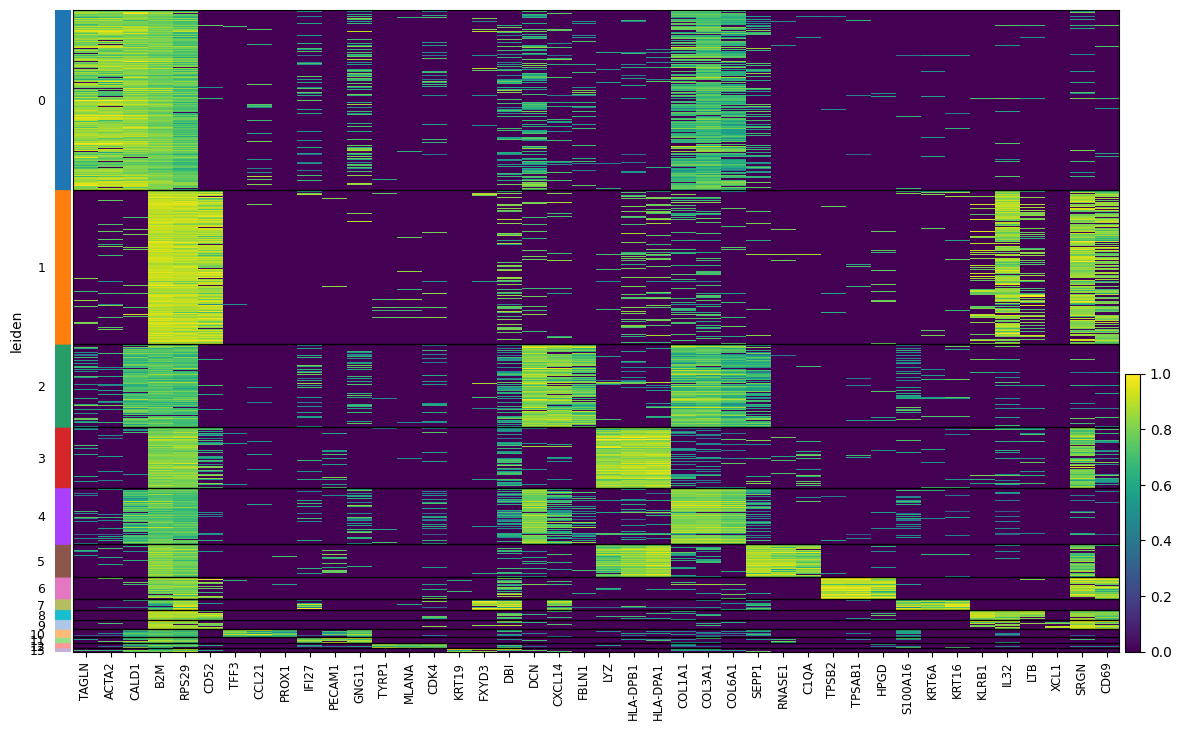

Saved: ../results/markers\heatmap_top3_per_cluster.png


In [5]:
# Heatmap (top 3 per cluster)
df_hm = (df_all.sort_values(["group", "scores"], ascending=[True, False])
              .groupby("group", sort=False)
              .head(TOPN_HEATMAP))

genes_hm = df_hm["names"].dropna().unique().tolist()
n_clusters = adata.obs[CLUSTER_KEY].nunique()
fig_h = max(6, 0.6 * n_clusters)

sc.pl.heatmap(
    adata,
    var_names=genes_hm,
    groupby=CLUSTER_KEY,
    use_raw=USE_RAW,
    standard_scale="var",
    dendrogram=False,
    figsize=(14, fig_h),
    show=False
)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=9)

save_show(fp(f"heatmap_top{TOPN_HEATMAP}_per_cluster.png"))
print("Saved:", fp(f"heatmap_top{TOPN_HEATMAP}_per_cluster.png"))


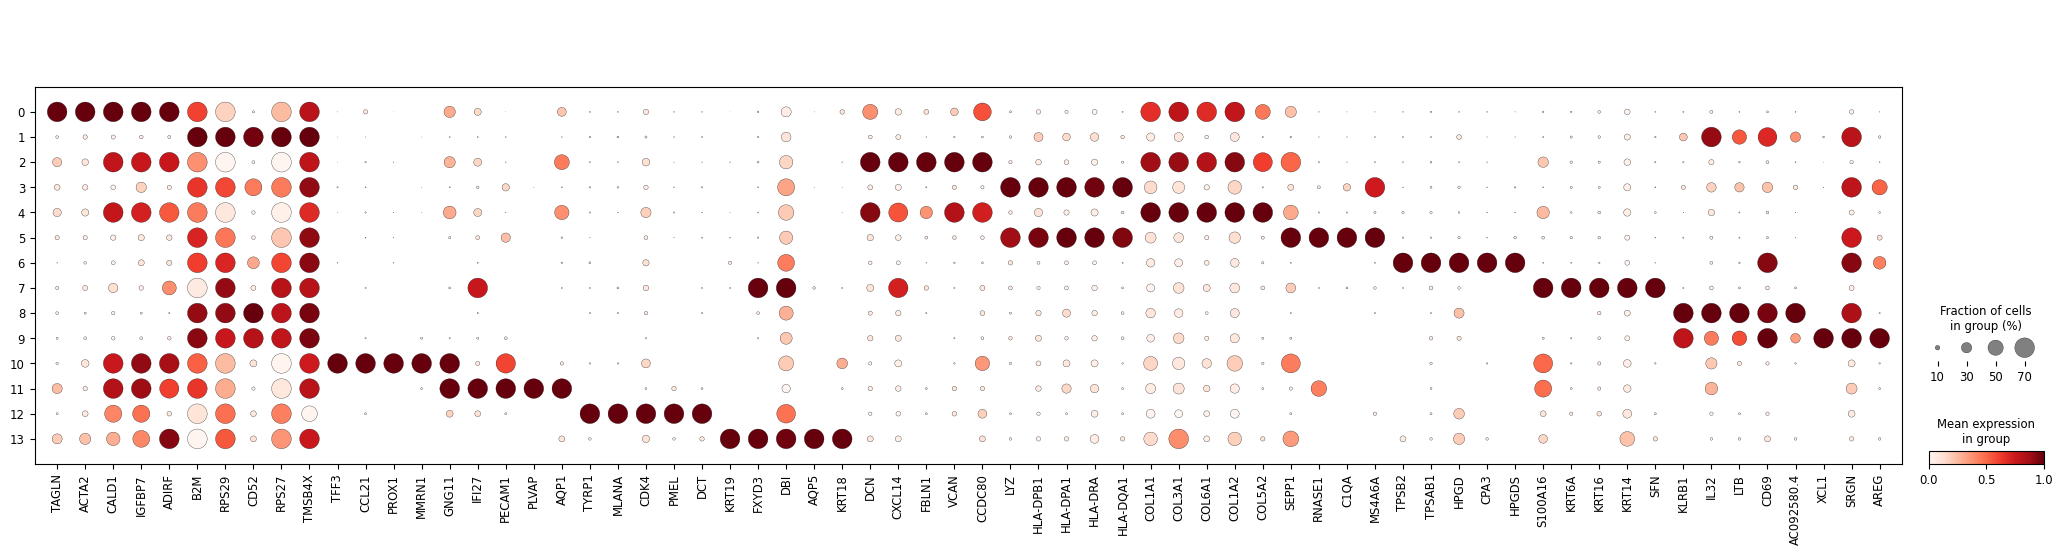

Saved: ../results/markers\dotplot_top5_per_cluster.png


In [6]:
# Dotplot (top 5 per cluster)
df_dp = (df_all.sort_values(["group", "scores"], ascending=[True, False])
              .groupby("group", sort=False)
              .head(TOPN_DOTPLOT))

genes_dp = df_dp["names"].dropna().unique().tolist()

sc.pl.dotplot(
    adata,
    var_names=genes_dp,
    groupby=CLUSTER_KEY,
    use_raw=USE_RAW,
    standard_scale="var",
    dot_max=0.7,
    show=False
)
save_show(fp(f"dotplot_top{TOPN_DOTPLOT}_per_cluster.png"))
print("Saved:", fp(f"dotplot_top{TOPN_DOTPLOT}_per_cluster.png"))

In [7]:
# Cell: Marker-panel presence check (prints missing/present)
marker_panel = [
    "PTPRC",
    "CD3D", "CD3E", "TRAC",
    "CD8A", "NKG7", "GNLY",
    "MS4A1", "CD79A",
    "LYZ", "LST1", "S100A8", "S100A9",
    "DCN", "COL1A1",
    "EPCAM", "KRT8", "KRT18",
    "MKI67"
]

# IMPORTANT: presence depends on which gene list you are using
# If you want to check the "raw" gene space, use adata.raw.var_names
USE_RAW = (adata.raw is not None)   # keep this consistent with the rest of your notebook

gene_universe = set(adata.raw.var_names) if USE_RAW else set(adata.var_names)

marker_present = [g for g in marker_panel if g in gene_universe]
marker_missing = [g for g in marker_panel if g not in gene_universe]

print(f"USE_RAW = {USE_RAW}")
print(f"Marker genes present: {len(marker_present)} / {len(marker_panel)}")
print("Present:", marker_present)
print("Missing:", marker_missing)


USE_RAW = True
Marker genes present: 19 / 19
Present: ['PTPRC', 'CD3D', 'CD3E', 'TRAC', 'CD8A', 'NKG7', 'GNLY', 'MS4A1', 'CD79A', 'LYZ', 'LST1', 'S100A8', 'S100A9', 'DCN', 'COL1A1', 'EPCAM', 'KRT8', 'KRT18', 'MKI67']
Missing: []


Marker genes present: 19 / 19
Missing: []


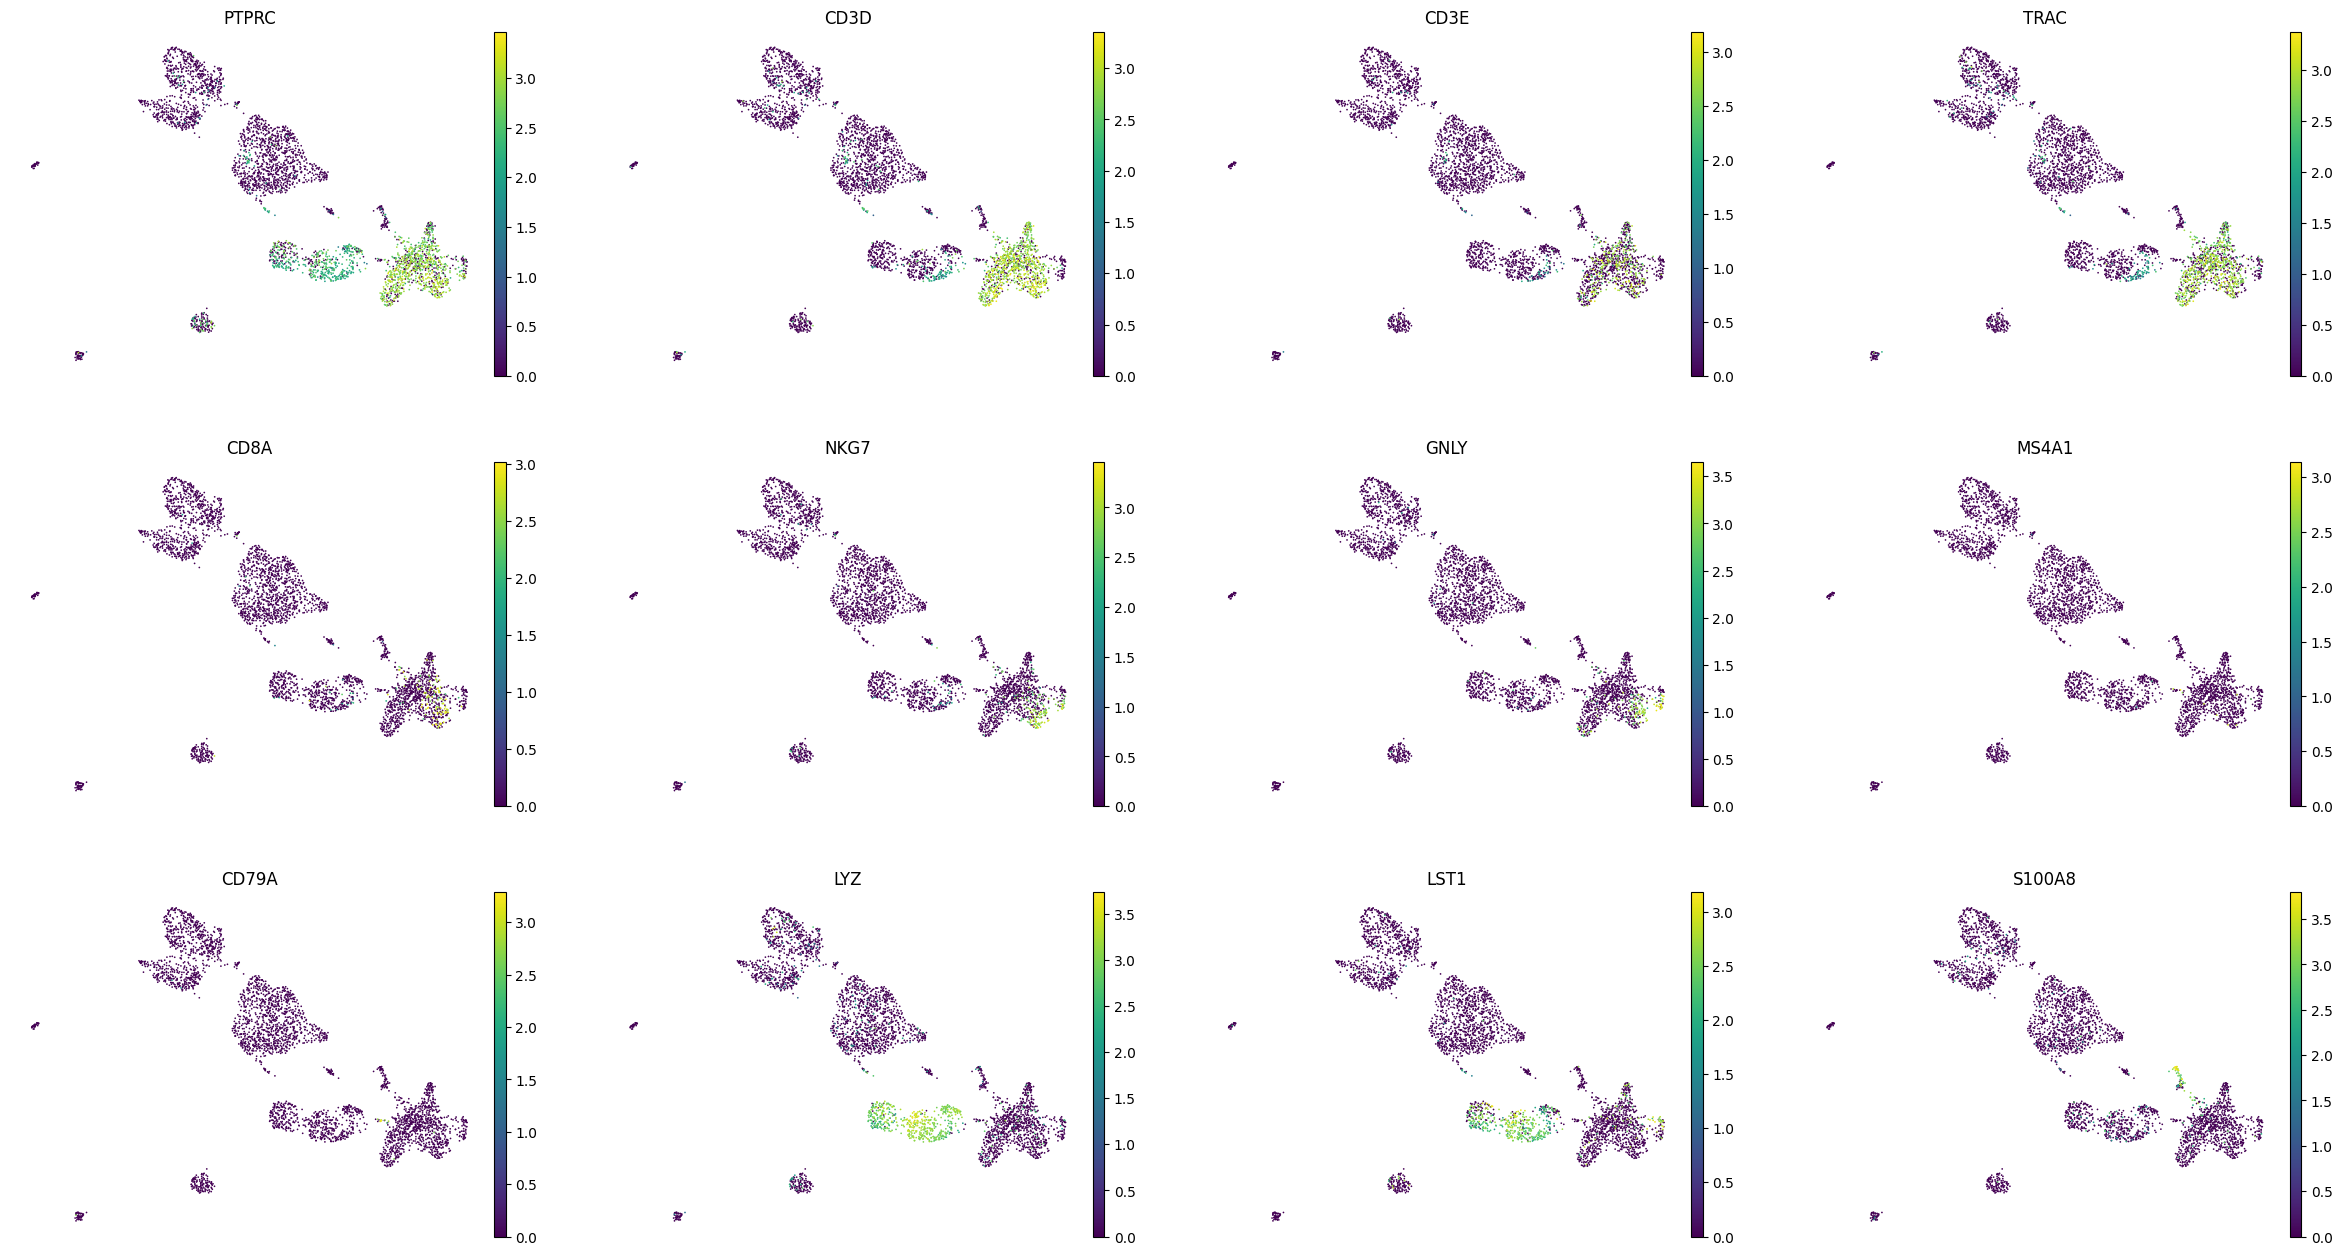

Saved: ../results/markers\umap_marker_panel_first12.png


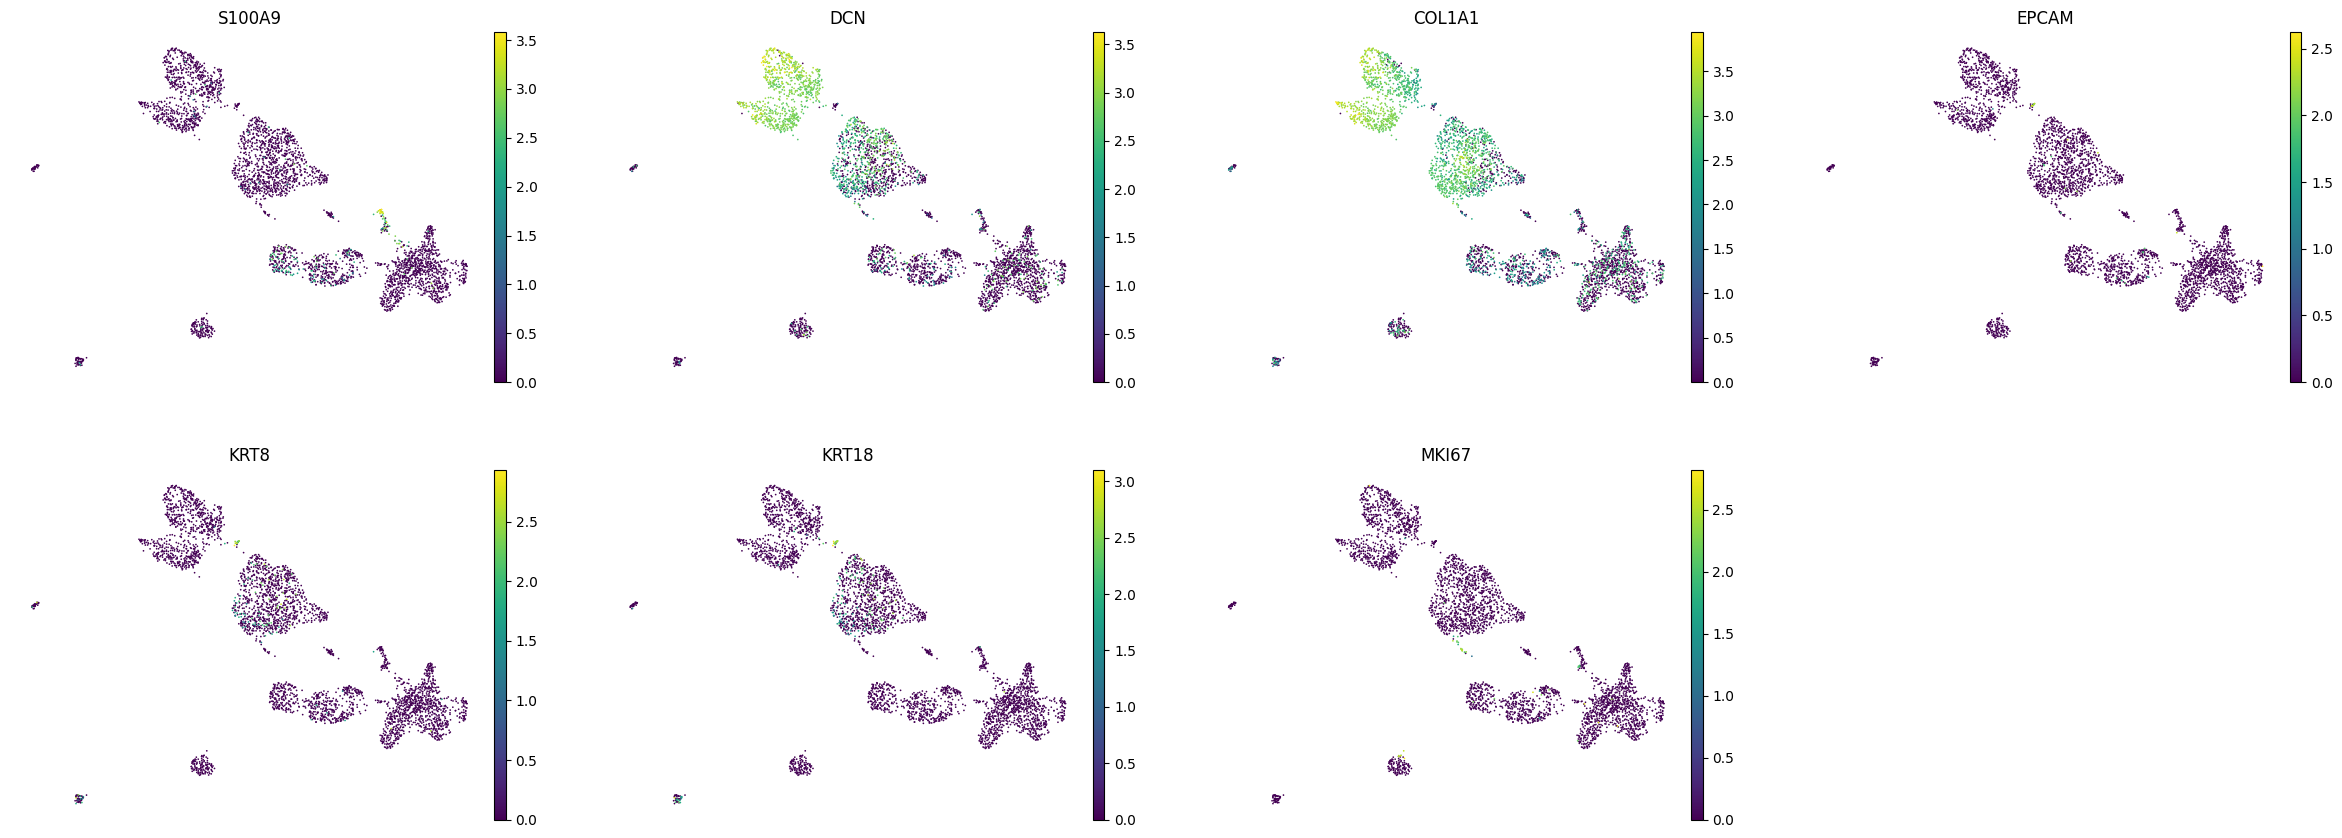

Saved: ../results/markers\umap_marker_panel_remaining.png


In [12]:
# Cell: Marker-panel UMAP expression plots (shows + saves)
import os
import matplotlib.pyplot as plt

UMAP_POINT_SIZE = 6
DPI = 300

marker_panel = [
    "PTPRC",
    "CD3D", "CD3E", "TRAC",
    "CD8A", "NKG7", "GNLY",
    "MS4A1", "CD79A",
    "LYZ", "LST1", "S100A8", "S100A9",
    "DCN", "COL1A1",
    "EPCAM", "KRT8", "KRT18",
    "MKI67"
]

# Use raw if available (recommended)
USE_RAW = (adata.raw is not None)
gene_universe = set(adata.raw.var_names) if USE_RAW else set(adata.var_names)
marker_present = [g for g in marker_panel if g in gene_universe]
marker_missing = [g for g in marker_panel if g not in gene_universe]

print(f"Marker genes present: {len(marker_present)} / {len(marker_panel)}")
print("Missing:", marker_missing)

def save_current_fig(outpath, dpi=DPI):
    fig = plt.gcf()
    fig.savefig(outpath, dpi=dpi, bbox_inches="tight")
    plt.show()
    plt.close(fig)
    print("Saved:", outpath)

if len(marker_present) > 0:
    # First 12
    sc.pl.umap(
        adata,
        color=marker_present[:12],
        ncols=4,
        use_raw=USE_RAW,
        size=UMAP_POINT_SIZE,
        frameon=False,
        show=False
    )
    save_current_fig(os.path.join(RESULTS_DIR, "umap_marker_panel_first12.png"))

    # Remaining
    if len(marker_present) > 12:
        sc.pl.umap(
            adata,
            color=marker_present[12:],
            ncols=4,
            use_raw=USE_RAW,
            size=UMAP_POINT_SIZE,
            frameon=False,
            show=False
        )
        save_current_fig(os.path.join(RESULTS_DIR, "umap_marker_panel_remaining.png"))
else:
    print("No marker genes found in var_names/raw.var_names. Check gene symbols / capitalization.")



In [9]:
# Final annotation list actual cluster ids present in your data
cluster_ids = sorted(adata.obs[CLUSTER_KEY].astype(int).unique())
print("Clusters present:", cluster_ids)

# IMPORTANT: keys must match cluster_ids (as strings after astype(str))
cluster_to_celltype = {
    "0":  "Pericytes / Smooth muscle",
    "1":  "T cells",
    "2":  "Myeloid",
    "3":  "Fibroblasts",
    "4":  "Tumor / Epithelial",
    "5":  "Cycling",
    "6":  "Endothelial",
    "7":  "NK cells",
    "8":  "B cells",
    "9":  "Dendritic",
    "10": "Lymphatic Endothelial",
    "11": "Endothelial",
    "12": "Tumor / Melanoma",
    "13": "Tumor / Epithelial",
}

# Apply robustly
adata.obs[CLUSTER_KEY] = adata.obs[CLUSTER_KEY].astype(int).astype(str)
adata.obs["cell_type"] = adata.obs[CLUSTER_KEY].map(cluster_to_celltype)

# If anything still missing, force Unknown (and print which cluster is missing)
missing = sorted(set(adata.obs[CLUSTER_KEY].unique()) - set(cluster_to_celltype.keys()), key=int)
print("Missing mapping for clusters:", missing)

adata.obs["cell_type"] = adata.obs["cell_type"].fillna("Unknown").astype("category")
display(adata.obs["cell_type"].value_counts())


Clusters present: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13)]
Missing mapping for clusters: []


cell_type
Pericytes / Smooth muscle    1019
T cells                       874
Myeloid                       470
Fibroblasts                   342
Tumor / Epithelial            342
Cycling                       185
Endothelial                   154
NK cells                       61
B cells                        56
Dendritic                      55
Lymphatic Endothelial          45
Tumor / Melanoma               29
Name: count, dtype: int64

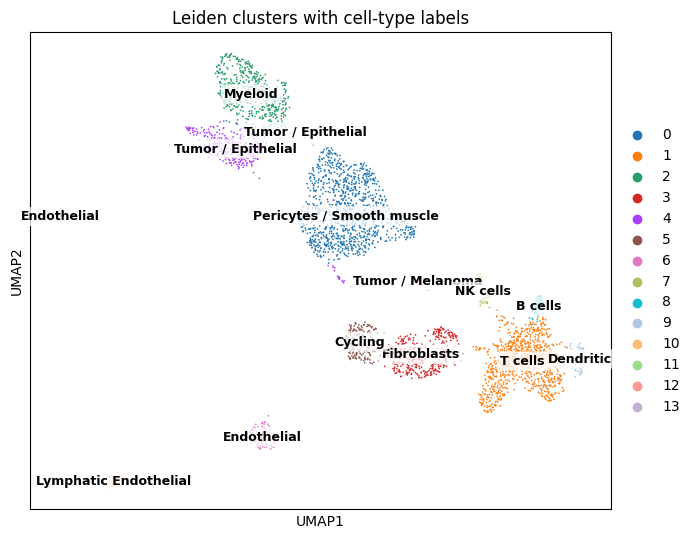

Saved: ../results/markers\umap_leiden_celltype_names_only.png


In [10]:
# Leiden colors + cell-type labels on each cluster
# UMAP: keep Leiden colors + right-side legend (cluster numbers),
# but label ON the plot with ONLY cell-type names (no "0:", "1:", etc.)

import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os

UMAP_POINT_SIZE = 6
DPI = 300

# 1) Plot Leiden clusters (keeps same colors + shows legend with cluster numbers)
sc.pl.umap(
    adata,
    color=CLUSTER_KEY,
    size=UMAP_POINT_SIZE,
    legend_loc="right margin",   # keeps the side legend with cluster numbers/colors
    frameon=True,
    title="Leiden clusters with cell-type labels",
    show=False
)

ax = plt.gca()
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")

# 2) Compute cluster centroids and label with ONLY cell-type names
um = adata.obsm["X_umap"]
tmp = pd.DataFrame(um, columns=["UMAP1", "UMAP2"], index=adata.obs_names)
tmp["cluster"] = adata.obs[CLUSTER_KEY].astype(str).values
tmp["cell_type"] = adata.obs["cell_type"].astype(str).values

centroids = tmp.groupby("cluster")[["UMAP1", "UMAP2"]].median()
labels = tmp.groupby("cluster")["cell_type"].agg(lambda x: x.value_counts().index[0])

for cl in centroids.index:
    x, y = centroids.loc[cl, ["UMAP1", "UMAP2"]]
    lab = labels.loc[cl]

    ax.text(
        x, y, lab,                      # ONLY name (no number)
        fontsize=9, fontweight="bold",  # make text visible
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", facecolor="white", alpha=0.75, linewidth=0)
    )

# 3) Save + show
out = os.path.join(RESULTS_DIR, "umap_leiden_celltype_names_only.png")
plt.gcf().set_size_inches(7.5, 6.2)
plt.savefig(out, dpi=DPI, bbox_inches="tight")
plt.show()
plt.close()

print("Saved:", out)


In [11]:
# Final save 
adata.write_h5ad(OUT_H5AD)
print("Saved final:", OUT_H5AD)

Saved final: ../data/processed/SKCM_GSE134388_aPD1_final_annotated.h5ad
